# Sanderson's Wonderland
### Angewandte Systemwissenschaften II 
#### Python - Wonderland
Einheit 2 / 10

# Semesterplan
---
1. Einführung in Python (Wiederholung von Comp. Basics VO)
2. **Einführung ins Wonderland-Modell**
3. Wonderland in Python - Quick & Dirty
4. Wonderland-Paket
5. Funktionale Programmierung
6. Objekt-orientierte Programmierung
7. Parameter Sweeps & Projektzuteilung
8. Projektdiskussion
9. Multiprocessing
10. -

## Inhalt
+ Modellierung allgemein
+ Das Wonderland - Modell
+ Seine Zustandsvariablen
+ Deren Funktionen
+ Szenarien im Wonderland

*Kursiv* geschriebene Fragen (mit ?), sind die HÜ Fragen! <br>
(*1-2 ganze Sätze je Frage reichen*)

## Modellierung
+ *Was ist der **Zweck** eines Modells?*
 
 

+ *Wofür finden Modelle **Verwendung**?*
 
 

+ *Welche **Modelle** gibt es zB?*
 
 

## Das Wonderland - Modell
+ **1992** entworfen, um die hoch komplexen **Modelle zur nachhaltigen Entwicklung** besser erklären zu können.
+ Ökonomische Modelle beinhalteten und berücksichtigten **keine Umwelt**.
    + Modelle **vereinfachen** die Realität
    + **Umwelt** wurde als **irrelevant** für die wirtschaftliche \
      Entwicklung angesehen.
+ Modelle zur **nachhaltigen Entwicklung** inkludieren eine Form von Umwelt-Ressourcen.

[*Sanderson, W.C. (1992). Simulation Models of Economic, Demographic,
and Environmental Interactions: Are They on a Sustainable Development
Path?. Laxenburg: International Institute for Applied Systems Analysis.*](http://pure.iiasa.ac.at/id/eprint/3613/)

## Das Wonderland - Modell
+ **Gleichungsbasiert**es, **makroskopisch**es Modell   

+ 4 **Zustand**svariablen

    + 1 **exogen**e
    
    + 3 **endogen**e

+ Ca. 14 **Parameter**

+ 2 **Szenarien**

    + Traum der ÖkonomInnen
    
    + Albtraum der UmweltschützerInnen

## Definition: Zustandsvariablen

Endogen 
>    **x** - Population <br>
    **y** - Wirtschaft *(Pro Kopf Produktion)* <br>
    **z** - Umwelt *(Verfügbare Ressource)*
    
 Exogen
>    **p** - Technologie *(Umweltverschmutzung Pro Produktion)*

## Definition: Parameter
Parameter können nicht einfach willkürlich gewählt werden! \
Es ist wichtig, dass diese **genau ermittelt** werden, entweder 
durch **Messungen** oder durch Kalibrierung, das sogenannte **'Fitting'**.

In diesem Sinne kann ein **Modell über die Zeit auch verbessert** werden 
und den Anschein erwecken 'dazuzulernen'.

In Sandersons ursprünglicher Definition dieses Modells verwendet er ein 
**Parameterset, \
welches wir vorerst als korrekt betrachten** können 
und verwenden wollen.

## Definition: Funktionen
Die Zustandsvariablen verändern sich mit der **simulierten Zeit**. \
Diese Veränderung wird durch die **Funktionen** des Wonderlands beschrieben.

Zu **Darstellung** brauchen wir das **Paket** ```matplotlib```. In diesem Paket eignet sich das **Modul** ```pyplot``` besonders gut um schnell zum Ergebnis zu kommen.

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

Wir werden sehr häufig eine **Funktion** benötigen, welche **aus drei
Kollektionen** (hier meistens Listen) einen **3D - Plot** erstellen kann. \
```mplot3d``` aus dem Paket ```mpl_toolkits``` ermöglicht 3D-Plots:

In [ ]:
from mpl_toolkits import mplot3d

def plot_3D(xs, ys, zs, labels=('x','y','z')):
    plt.figure(figsize=(10,10))
    ax = plt.axes(projection='3d')

    ax.contour3D(xs,ys,zs,300)

    x,y,z = labels
    ax.set_xlabel(x)
    ax.set_ylabel(y)
    ax.set_zlabel(z);

<div class="alert alert-block alert-info">
<h3>Tipp: Code in Büchern und Online - Beispielen</h3>
    
Liest man Code welcher in Lehrmaterial enthalten ist, bekommt man oft den Eindruck, <br>
dass man selbst nie so präzise und vorausschauend arbeiten könnte.
<br><br>
Tatsächlich entstehen Funktionen wie die obige <code>plot_3D</code> - Funktion erst <strong>nachdem</strong> <br>
der Autor erkannt hat, dass er den selben Code oft wiederverwendet und daher einfach <br>
in einer Funktion bündeln könnte. <br>
Diese Funktion wird dann vorangestellt, da sie ja für alle folgenden Abschnitte wichtig ist.
</div>

## Kosten des Umweltschutzes
Umweltschutz kostet etwas. **Abhängig von Umweltzustand und Wirtschaft** ändern sich diese Kosten in Wonderland. \
Die Formel für diese Kosten beinhaltet **zwei Parameter**: $\phi$ (Phi) und $\mu$ (My)
# $c = \phi * (1.0 -z)^\mu * y$

Bei **unverschmutzter** Umwelt: \
    $(z=1) \quad \Rightarrow \quad c = 0$ 

Mit zunehmender **Umweltverschmutzung**: \
    $(z \rightarrow 0) \quad \Rightarrow \quad c = \phi y$ 

Der **Verlauf dazwischen** wird bestimmt durch $\mu$. Diesem wollen wir uns nun zuerst widmen.

Wie **verhalten** sich die Kosten für den Umweltschutz bei einer konstanten Wirtschaftsleistung von 1
**abhängig vom Zustand der Umwelt**? 

*Welchen Einfluss hat der **Parameter µ**?*

In [ ]:
_c = lambda z,µ: 0.5*(1-z)**µ
zs = [0.01*i for i in range(100)]
µs = [0.01*i for i in range(200)[::2]]
res = [[_c(z,µ) for z in zs] for µ in µs]

plot_3D(zs,µs,res,('z','µ','res'))

Mit Sandersons Parameter ergibt sich folgende Gleichung:

$c = \phi * (1.0 -z)^\mu * y$

$\phi = 0.5$
$\mu = 2$

Setzen wir das $\mu$ fest, können wir den Verlauf der Kosten 
mit dem Umweltzustand so analysieren, \
wie er in Sanderson's Simulationen auftritt.

In [ ]:
res = [_c(z,2) for z in zs]
res.sort()
plt.plot(res)

*Wie verhalten sich die Kosten für den Umweltschutz abhängig von Wirtschaftsleistung und Umweltzustand?*

In [ ]:
c = lambda y,z: 0.5 * (1-z)**2 * y
ys = [i for i in range(1000)[::10]]
res = [[c(y,z) for z in zs] for y in ys]

plot_3D(zs,ys,res,('z','y','res'))

## Netto - Produktion
Die **Umweltkosten** welche im Wonderland als Modell zur nachhaltigen Entwicklung \
eingeflossen sind, wirken sich **je nach Umweltzustand** stark auf die Wirtschaft aus.

Daher ist der **Wohlstand** in Wonderland nicht direkt durch die Wirtschaftsleistung $y$ gegeben. \
Vielmehr ist es die Netto - Produktion, welche den tatsächlichen Wohlstand im Wonderland abbildet:

# $\bar{y}(y,z) = y - c(y,z) = y - \phi (1 - z)^\mu y$

Bei **unverschmutzter** Umwelt: \
    $(z=1) \quad \Rightarrow \quad c = 0 \quad \Rightarrow \quad \bar{y} = y$ 

Mit zunehmender **Umweltverschmutzung**: \
    $(z \rightarrow 1) \quad \Rightarrow \quad c = \phi y = \frac{y}{2} \quad \Rightarrow \quad \bar{y} = \frac{y}{2}$

Der **Verlauf dazwischen** wird bestimmt durch $\mu = 2$.

Wir substrahieren einfach ```res``` (welches den Verlauf von $c$ beinhaltet)
vom zugehörigen ```y``` und erhalten die Darstellung für $\bar{y}$:

In [ ]:
res = [[y-r for r in rs] for y,rs in zip(ys,res)]
plot_3D(zs,ys,res,('z','y','res'))

## Population
Die Einwohner Wonderlands wollen wir Wummis nennen. Die **Veränderung** ihrer Anzahl ist gegeben durch die **Differenz aus \
Geburten- ```b```** und **Sterberate ```d```:**

# $\frac{dx}{dt}=x(b(y,z)-d(y,z))$

Beide diese Raten sind **abhängig von Wirtschaftsleistung und Umweltzustand**.

$b > d \quad \Rightarrow \quad$ Population steigt \
$b < d \quad \Rightarrow \quad$ Population stinkt

### Geburtenrate
In die Formel zur Geburtenrate fließen **drei Parameter** ein: $\beta$ (Beta), $\beta_1$ (Beta eins) und $\beta_2$ (Beta zwei). \
Außerdem hängt sie von der Nettoproduktion $\bar{y}$ (y-Strich) ab:

# $b(y,z) = \beta_1 ( \beta_2 - \frac{e^{\beta \bar{y}}}{1+e^{\beta \bar{y}}} )$

Mit Parameterwerten lässt sich nun wieder das originale Verhalten analysieren: 

$b(y,z) = \beta_1 ( \beta_2 - \frac{e^{\beta \bar{y}}}{1+e^{\beta \bar{y}}} )$ 

$\beta_1 = 0.04$
$\beta_2 = 1.357$
$\beta = 0.16$

*In dieser Definition tritt die **Exponential - Funktion** auf, wo finden wir diese in Python?*

In [ ]:
# Wir importieren die Exponential-Funktion aus dem math-Paket
from math import exp

# Kleine Erinnerung: Wie verhält sich die Exponential-Funktion?
plt.plot([exp(0.16*y) for y in range(10)])

Wie verhält sich der Wert des **letzten Term**s der Geburtenrate \
abhängig von der Nettoproduktion?

### $b(y,z) = \beta_1 ( \beta_2 - \color{red}{\frac{e^{\beta \bar{y}}}{1+e^{\beta \bar{y}}}})$ 

In [ ]:
_b = lambda x: exp(0.16*x)

plt.plot([_b(y) / (1+_b(y)) for y in range(50)])

Für diesen Term erstellen wir nun eine **Hilfsfunktion** welche die Nettoproduktion beinhält und als **Konstante** ```C``` einen Parameter übernimmt, sodass alle Parameter in der eigentlichen Funktion für die Geburtenrate enthalten sind.

In [ ]:
_bd = lambda C,y,z: exp(C * (y-c(y,z))) / (1 + exp(C * (y-c(y,z))))

Die eigentliche Funktion der **Geburtenrate** lautet dann:

In [ ]:
b = lambda y,z: 0.04 * (1.357-_bd(0.16,y,z))

***Wie verhält sie sich*** *abhängig von der Wirtschaftsleistung $y$ und Umweltzustand $z$?*

In [ ]:
zs = [0.01*i for i in range(100)]
ys = [i for i in range(100)]
res = [[b(y,z) for y in ys] for z in zs]

plot_3D(ys,zs,res,('y','z','res'))

**Drei Szenarien** mit unterschiedlicher, konstanter **Umweltverschmutzung**; \
**Vergleich:** Wie verhält sich die **Geburtenrate abhängig von der Wirtschaft** bei unterschiedlichen Umweltzuständen?

In [ ]:
plt.plot([b(y,0) for y in ys],color='darkblue')
plt.plot([b(y,0.1) for y in ys], color='darkgreen')
plt.plot([b(y,1) for y in ys],color='darkorange')

## Sterberate
Die Formel zur Sterberate **gleicht** jener der **Geburtenrate**, es kommt jedoch **ein zusätzlicher Term** am Ende hinzu. 

Es fließen ganze **fünf Parameter** ein: $\alpha$ (Alpha), $\delta_1$ (Delta eins), $\delta_2$ (Delta zwei), $\delta_3$ (Delta drei) und $\theta$ (Theta). \
Außerdem hängt sie von der Nettoproduktion $\bar{y}$ (y-Strich) ab:
# $d(y,z) = \delta_1 ( \delta_2 - \frac{e^{\alpha \bar{y}}}{1+e^{\alpha \bar{y}}} ) (1+\delta_3 (1-z)^\theta)$

Wir können wieder Sandersons Parameter einsetzen um auch diese Gleichung genauer analysieren zu können:

#### $d(y,z) = \delta_1 ( \delta_2 - \frac{e^{\alpha \bar{y}}}{1+e^{\alpha \bar{y}}} ) (1+\delta_3 (1-z)^\theta)$
$\delta_1 = 0.01$
$\delta_2 = 2.5$
$\delta_3 = 4$
$\alpha = 0.18$
$\theta = 15$

In [ ]:
plt.plot([4 * (1-z)**15 for z in zs])

*Welchen Unterschied macht der zusätzliche Term (im Vergleich zur Geburtenrate)?*

Die eigentliche Funktion für die **Sterberate nutzt** wieder
die ```_bd``` **Funktion** welche bei der Geburtenrate definiert wurde. \
Diesmal wird ihr statt des Parameters $\beta$, **$\alpha$ als**
Wert für die **Konstante** ```C``` in ihrer Definition überreicht.

In [ ]:
d = lambda y,z: 0.01 * (2.5-_bd(0.18,y,z)) \
  * (1 + 4 * (1-z)**15)

# Welchen Wert nimmt die Sterberate bei verschiedenen y/z an?

res = [[d(y,z) for z in zs] for y in ys]

plot_3D(zs,ys,res,('z','y','res'))

<div class="alert alert-block alert-info">
<h3>Tipp: Zeilenumbrüche in Python</h3>
    
Zu lange Zeilen Code werden schnell unübersichtlich. Es gilt als <br>
gute Praxis eine maximale Anzahl von 80 bis 100 Zeichen einzuhalten. <br>
Will man einen Zeilenumbruch einbauen, eignet sich <code>\</code> wie zB: <br>
<code>langer_text = "Ich habe das starke \\
Bedürfnis mich präzise auszudrücken."</code>
<br><br>
Man kann stattdessen aber auch einfach den Ausdruck in Klammern setzen. <br>
Dann muss man aber die Strings einzeiln mit Anführungszeichen versehen: <br>
<code>langer_text = (
    "Ich habe das starke"
    "Bedürfnis mich präzise auszudrücken."
)</code>
<br><br>
Will man hingegen mehrere Code - Zeilen in eine effektive Zeile packen, <br>
benutzt man das Semikolon <code>;</code> zB: <br>
<code>alpha = 0; beta = 1; theta = 3</code>
</div>

Aus der 3D Darstellung wird **nicht deutlich**, wie das **Verhalten** bei unterschiedlichen Werten **für $y$** genau aussieht. \
Es lohnt sich daher ein **paar dieser Werte** festzusetzen und **genauer zu analysieren**:

In [ ]:
for y,col in zip([0,50],['red','blue']):
    plt.plot([d(y,z) for z in zs],color=col)

### Vergleich Geburten- vs Sterberate
## Geburtenrate: $b(y,z) = \beta_1 ( \beta_2 - \frac{e^{\beta \bar{y}}}{1+e^{\beta \bar{y}}} )$
## Sterberate: $d(y,z) = \delta_1 ( \delta_2 - \frac{e^{\alpha \bar{y}}}{1+e^{\alpha \bar{y}}} ) (1+\delta_3 (1-z)^\theta)$

Bei vollen Ressourcen $(z=1)$ sind die **Ausdrücke gleich** (mit unterschiedlichen Parametern). \
Mit steigender Umweltverschmutzung $(z \rightarrow 0)$ ist die **Sterberate erhöht**.

### Grafischer Vergleich

Nachdem wir **beide**, auch in Python definiert haben können wir ihre **Verläufe grafisch vergleichen**.

Wir definieren eine **Funktion** ```rate```, welche eine **andere Funktion als Argument** ```r``` übernimmt. \
In der Funktion wenden wir dann diese übergebene Funktion auf verschiedene \
**Umweltzustände** $z$ von ```0.0``` bis ```1.0``` an. \
Das erste Argument, die **Wirtschaft** $y$, **bleibt konstant**.

Unserer neuen Funktion ```rate``` **überreichen wir** dann jeweils die **Geburten- bzw. \
Sterberate** als Argument ```r``` und sie berechnet diese Rate dann für die $z$-Werte.

In [ ]:
rate = lambda r: [r(15,z) for z in zs]

plt.plot(rate(b), label='Geburten')
plt.plot(rate(d), label='Fatalitäten')
plt.legend() # mit legend() aktivieren wir die Legende rechts oben

**Nun** kehren wir den Spieß um und halten $z$ **konstant** 
während wir $y$ **zwischen** ```0```  **und** ```100``` variieren.

In [ ]:
rate = lambda r: [r(y,0) for y in ys]

# Wieder lassen sich beide Raten schnell darstellen:
plt.plot(rate(b), label='Geburten')
plt.plot(rate(d), label='Fatalitäten')

differenz = [bs-ds for bs,ds in zip(rate(b),rate(d))]

plt.plot(differenz, label='Differenz')
plt.legend()

<div class="alert alert-block alert-info">
<h3>Tipp: 'zip' - der Python-Reißverschluss</h3>
    
Mit der <code>zip</code> - Funktion erstellen wir <strong>aus den zwei Listen</strong> der 'rate'-Funktionen <strong>eine</strong> gemeinsame Liste mit den Ergebnissen in Tupeln:

<pre><code>zip([a,b],[c,d]) => [(a,b),(c,d)]</code></pre>
Diese Liste kann folgend in der List-Comprehension entpackt und die Differenz der Ergebnisse gebildet werden.
<br><br>
<strong>Achtung</strong>: Ist eine der Listen kürzer, hört <code>zip</code> nach dieser auf und beendet die Liste.
</div>

# Wirtschaft
Die **Änderung** der Produktion pro Kopf ist abhängig vom **Umweltzustand** und der **Wirtschaftsleistung selbst**. \
Außerdem wird sie durch **drei Parameter** bestimmt: $\gamma$ (Gamma), $\eta$ (Eta) und $\lambda$ (Lambda).
# $\frac{dy}{dt}=y[\gamma-(\gamma+\eta)(1-z)^{\lambda}]$

Bei **unverschmutzter** Umwelt: \
    $(z=1)$ **steigt** die Produktion um den Faktor Gamma ($\gamma$). 

Mit zunehmender **Umweltverschmutzung**: \
    $(z \rightarrow 1)$ **sinkt** sie um den Faktor Eta ($\eta$).

Der **Verlauf dazwischen** wird bestimmt durch $\lambda$.

Einmal mehr setzen wir die **Parameter** wie sie **von Sanderson** benutzt wurden ein.

## $\frac{dy}{dt}=y[\gamma-(\gamma+\eta)(1-z)^{\lambda}]$
$\gamma = 0.02$
$\eta = 0.1$
$\lambda = 2$

Und gehen zur grafischen Analyse über.

*Wie Verhält sich der **vom Umweltzustand z abhängige Teil** der Änderung der Wirtschaft?*

## $\frac{dy}{dt}=y[0.02-(0.02+0.1)\color{red}{(1-z)^{2}}]$

In [ ]:
_dy = lambda z: (1-z)**2
plt.plot([_dy(z) for z in zs])

Die Funktion für die **Änderung der pro Kopf Produktion**. \
Für den letzten Term benutzen wir ```_dy``` aus der vorhergehenden
Zelle!

In [ ]:
dy = lambda y,z: y*(0.02-(0.02+0.1)*_dy(z))

*Wie groß muss die Umweltverschmutzung $z$ sein, damit sich im Wonderland **kein Wirtschaftswachstum mehr** ergibt?*

In [ ]:
plt.plot([dy(1,z) for z in zs])
plt.plot((0, 100),(0, 0), c = "red", lw = 2)

# Umwelt
Der Umweltzustand ist bisher **in jeder Gleichung einer Zustandsvariable** mit eingeflossen. \
Die Umwelt beeinflusst sich sogar selbst. Ihre **Wechselwirkung** mit den anderen Teilen des \
Wonderlands ist sehr komplex. \
Dementsprechend ist dieser Teil auch der **aufwändigste Teil** der Definition dieses Modells.

Das soll uns aber nicht abschrecken. Wir erkunden nun Stück für Stück den **wahrscheinlich \
wichtigsten** Teil wenn es um **nachhaltige Entwicklung** geht.

## Fluss an Umweltverschmutzungen
Um den Einfluss der Wummis auf ihre Umwelt zu beziffern, nutzt Sanderson \
die sogenannte ***I-PAT - Identität***:

$I = P \times A \times T$

Wobei $I$ für den **Impakt** steht, welcher **abhängig von** der Population $P$, der Affluenz $A$ (= Wohlstand) und der Technologie $T$ ist.

Im Modell sind das die Zustandsvariablen $x$, $y$ und $p$, welche den **ersten Term** der Gleichung für den Fluss ausmachen.

Wie wir aber bereits wissen, lassen sich die Einwohner von Wonderland den **Schutz ihrer Umwelt** \
abhängig von deren Zustand durchaus etwas kosten. Dies wirkt sich in einer **Reduktion des Flusses** \
aus, welche im **zweiten Term** beschrieben wird.

Hier bestimmen **zwei Parameter** den Einfluss dieser Ausgaben: $\kappa$ (Kappa) und $\epsilon$ (Epsilon).
# $f(x,y,z,p)=pxy-\kappa[\frac{e^{\epsilon c(y,z) x}}{1 + e^{\epsilon c(y,z) x}}-0.5]$

Mit den Parameter aus Sandersons Definition können wir mit einer **Analyse** fortfahren.

## $f(x,y,z,p)=pxy-\kappa[\frac{e^{\epsilon c(y,z) x}}{1+e^{\epsilon c(y,z) x}}-0.5]$

$\kappa = 2$
$\epsilon = 0.02$

In [ ]:
# Funktion für den Fluss an Umweltverschutzungen:
f = lambda x,y,z,p: p*x*y - 2*(exp(0.02*c(y,z)*x) / (1+exp(0.02*c(y,z)*x)) - 0.5)

*Warum findet sich der Term $-0.5$ nach den Ausgaben für den Umweltschutz?* (Tipp: *Welche Werte nimmt der Bruch davor maximal/minimal an?*)

Je nach **Stand der Technologie**, ergibt sich eine **unterschiedliche
Abhängigkeit** f's von Wirtschaft und Umweltzustand. \
Wir erstellen daher 6 Graphen um zu beurteilen, wie sich dieses
Verhalten darstellt.

In [ ]:
for p in (500,50,10,5,2.5,1,0):
    res = [[f(1,y,z,p*0.001) for z in zs] for y in ys]

    plt.figure(figsize=(7,7))
    ax = plt.axes(projection='3d')

    ax.contour3D(zs,ys,res,300)
    ax.set_title('p: {}'.format(str(p*0.001)))
    ax.set_xlabel('z')
    ax.set_ylabel('y')
    ax.set_zlabel('f');
    #ax.set_zlim((0,1));

### Man beachte die Werte welche sich für f ergeben!
Bei $p = 0.5$ erreicht f bei einer Wirtschaftsleistung von $100$ Stück / Kopf einen Wert von $50$ ! \
Ist $p = 0.05$ sind es nur noch $5$, und bei $0.005$ wächst die **Abhängigkeit vom Umweltzustand** \
bereits stark an.

Der Fluss **kann auch negativ werden**, wenn die Technologie weit fortgeschritten \
($\rightarrow$ besonders geringer p-Wert) ist.

## Umweltzustand

**Drei Faktoren** sind in der Gleichung der Änderung des Umweltzustandes relevant:
- Die **Abhängigkeit vom derzeitigen Zustand** der Umwelt ist sehr komplex.

- Die Umwelt besitzt die **Fähigkeit sich selbst zu reinigen**. <br>
  Dies wird durch die Funktion $g(z) = \delta z^{\rho}$ beschrieben.
  
- Sind Selbstreinigung und **Fluss an Umweltverschmutzungen** gleich, <br>
  ergibt sich eine Änderung von $0$.

# $\frac{dz}{dt}=\nu z(1-z)(e^{\delta z^{\rho}-\omega f(x,y,z,p)}-1)$
$\nu = 1$
$\delta = 1$
$\rho = 2$
$\omega = 0.1$

```dz``` **nutzt** die vorherige **Definition des Flusses** an Umweltverschmutzungen ```f```.

Welchen **Einfluss** haben Technologie $p$, Umweltzustand $z$ und Wirtschaftsleistung $y$ auf die Änderung des Umweltzustandes?

In [ ]:
dz = lambda x,y,z,p: z*(1-z)*(exp(z**2-0.1*f(x,y,z,p))-1)

for p in [0.5,0.1,0.01,0]:
    res = [[dz(1,y,z,p) for z in zs] for y in ys]
    
    plt.figure(figsize=(7,7))
    ax = plt.axes(projection='3d')
    ax.set_title('p: {}'.format(str(p)))
    ax.contour3D(zs,ys,res,100)
    ax.set_xlabel('z')
    ax.set_ylabel('y');

*Wann verbessert sich der Umweltzustand?*
*Wann verschlechtert er sich?*

# Technologie

In der Technologie finden wir die einzige **exogen**e Zustandsvariable des Wonderlands. \
Ihre **Änderung** ist gegeben durch:

# $\frac{dp}{dt}=-\chi p$

Es gibt nur einen Parameter: $\chi$ (Chi). \
Der Parameter Chi **bestimmt das Schicksal**
unserer Wunderländer.

In [ ]:
dp = lambda chi,p: - chi * p

plt.plot([dp(0.04,t*0.01) for t in range(100)])
plt.plot([dp(0.01,t*0.01) for t in range(100)])

Die **Differentialgleichung** für die Technologie **lässt sich leicht analytisch lösen**. \
Als **Startwert** benutzen wir, so wie Sanderson: $1$. Dies erleichtert auch die Interpretation.

## $p(t) = p_0 * e^{-\chi * t}$
$p_0 = 1$ 

Wir können uns also schon jetzt das Verhalten der exogenen Zustandsvariable im **Lauf von 300 Jahren ansehen**:

In [ ]:
p = lambda chi,t: exp(-chi*t)
plt.plot([p(0.04,t) for t in range(300)], label="schnell")
plt.plot([p(0.01,t) for t in range(300)], label="langsam")
plt.legend()

## Betrachten wir noch einmal die Darstellungen zur Umwelt.
+ *Kann die Technologie **so weit fortschreiten**, dass die Umwelt **keinen Schaden** mehr davonträgt?*
    + **Wenn ja:** *Unter welchem Chi?*
    + **Wenn nein:** *Gibt es ein Chi in welchem dies Eintritt?*

# Schicksal des Wonderlands

Wie ergeht es nun dem Wonderland in Sanderson's Paper? 

Wir importieren das Wonderland-Paket, welches wir später gemeinsam entwickeln werden:

~~~python
import wonderland as wl
~~~

Zuerst das sogenannte **Economist's Dream Scenario**. Also der Traum der Ökonomen.

+ ```x``` steht für die **Population** und ist blau dargestellt.
+ ```z``` steht für die **Umwelt** und gelb.
+ ```p``` stellt die Entwicklung der **Technologie** in grün dar.


~~~python
dream_scenario = wl.Scenario(wl.Wonderland(wl.dream_parameters))
plt.plot([(x,z,p) for x,_,z,p in dream_scenario.ergebnis])
~~~

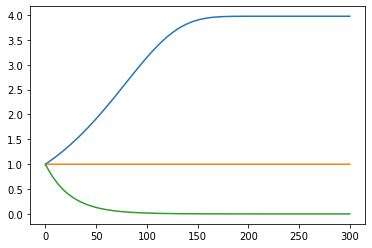

Wie man sieht, stabilisiert sich die Bevölkerungsentwicklung nach einem anfänglichen Wachstum und die Umweltkosten pro Produktionseinheit fallen nach 300 Jahren auf annähernd $0$.

*Wie verhält sich nun die Wirtschaft wenn man den Zustand der restlichen Variablen nach 200 Jahren als konstant betrachtet?*

Im **Gegensatz** dazu steht das **Environmentalist's Nightmare Scenario** oder auch kurz **Horror Scenario** genannt. 

~~~python
plt.plot([(x,z,p) for x,_,z,p in wl.Scenario(wl.Wonderland(wl.horror_parameters)).ergebnis])
~~~

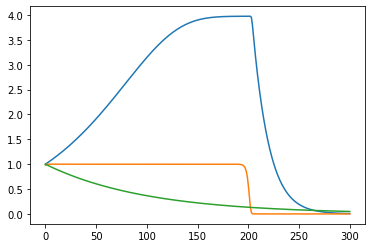

Nach 200 Jahren der **annähernd gleichen** Entwicklung, kommt es plötzlich zur Katastrophe. 

*Was war die Ursache dafür, dass es zur Katastrophe kam?* (Tipp: *Vergleiche die Graphen der Szenarien, es ändert sich nur ein Parameter!*)

## Zusammenfassung
+ Was ist Modellierung?
+ Zweck des Wonderland - Modells
+ Zustandsvariablen
+ Szenarien im Wonderland

<div class="alert alert-block alert-danger">
<h3>Übungsaufgabe: Die Fragen im Skript ausarbeiten!</h3>
    
Beantworte alle <i>kursiv geschriebenen</i> Fragen im Skript. Ein bis zwei ganze Sätze pro Frage reichen.
<br><br>
Hier alle Fragen zum Herauskopieren:
<br><br>
<ol>
<li><i>Was ist der <strong>Zweck</strong> eines Modells?</i></li>
<li><i>Wofür finden Modelle <strong>Verwendung</strong>?</i></li>
<li><i>Welche <strong>Modelle</strong> gibt es zB?</i></li>
<li><i>Welchen Einfluss hat der <strong>Parameter µ</strong>?</i></li>
<li><i>Wie verhalten sich die Kosten für den Umweltschutz abhängig von Wirtschaftsleistung und Umweltzustand?</i></li>
<lI><i>In dieser Definition tritt die <strong>Exponential - Funktion</strong> auf, wo finden wir diese in Python?</i></li>
<li><strong><i>Wie verhält sie sich</i></strong> <i>abhängig von der Wirtschaftsleistung $y$ und Umweltzustand $z$?</i></li>
<li><i>Welchen Unterschied macht der zusätzliche Term (im Vergleich zur Geburtenrate)?</i></li>
<li><i>Wie Verhält sich der <strong>vom Umweltzustand z abhängige Teil</strong> der Änderung der Wirtschaft?</i></li>
<li><i>Wie groß muss die Umweltverschmutzung $z$ sein, damit sich im Wonderland <strong>kein Wirtschaftswachstum mehr</strong> ergibt?</i></li>
<li><i>Warum findet sich der Term $-0.5$ nach den Ausgaben für den Umweltschutz?</i> (Tipp: <i>Welche Werte nimmt der Bruch davor maximal/minimal an?</i>)</li>
<li><i>Wann verbessert sich der Umweltzustand?</i></li>
<li><i>Wann verschlechtert er sich?</i></li>
<li><i>Kann die Technologie <strong>so weit fortschreiten</strong>, dass die Umwelt <strong>keinen Schaden</strong> mehr davonträgt?</i>
    <ul>
        <li><strong>Wenn ja:</strong> <i>Unter welchem Chi?</i></li>
        <li><strong>Wenn nein:</strong> <i>Gibt es ein Chi in welchem dies Eintritt?</i></li>
    </ul>
</li>
<li><i>Wie verhält sich nun die Wirtschaft wenn man den Zustand der restlichen Variablen nach 200 Jahren als konstant betrachtet?</i></li>
<li><i>Was war die Ursache dafür, dass es zur Katastrophe kam?</i> (Tipp: <i>Vergleiche die Graphen der Szenarien, es ändert sich nur ein Parameter!</i>)</li>
</ol>
</div>